# Import libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

# Explore county/state us daily covid data

In [36]:
us_cty_daily = pd.read_csv("cs156b-data/us/covid/nyt_us_counties_daily.csv")
us_cty_daily

,fips,date,county,state,cases,deaths
0,53061,2020-01-21,Snohomish,Washington,1.0,0.0
1,53061,2020-01-22,Snohomish,Washington,0.0,0.0
2,53061,2020-01-23,Snohomish,Washington,0.0,0.0
3,53061,2020-01-24,Snohomish,Washington,0.0,0.0
4,53061,2020-01-25,Snohomish,Washington,0.0,0.0
...,...,...,...,...,...,...
1141172,15005,2021-03-19,Kalawao,Hawaii,0.0,0.0
1141173,15005,2021-03-20,Kalawao,Hawaii,0.0,0.0
1141174,15005,2021-03-21,Kalawao,Hawaii,0.0,0.0
1141175,15005,2021-03-22,Kalawao,Hawaii,0.0,0.0


In [54]:
us_state_daily = us_cty_daily.loc[:,['date', 'state', 'cases', 'deaths']]
us_state_daily

,date,state,cases,deaths
0,2020-01-21,Washington,1.0,0.0
1,2020-01-22,Washington,0.0,0.0
2,2020-01-23,Washington,0.0,0.0
3,2020-01-24,Washington,0.0,0.0
4,2020-01-25,Washington,0.0,0.0
...,...,...,...,...
1141172,2021-03-19,Hawaii,0.0,0.0
1141173,2021-03-20,Hawaii,0.0,0.0
1141174,2021-03-21,Hawaii,0.0,0.0
1141175,2021-03-22,Hawaii,0.0,0.0


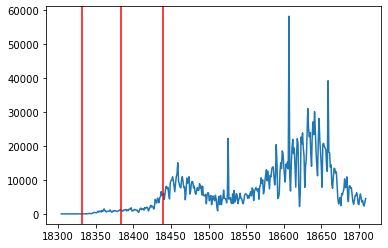

In [93]:
texas_daily = us_state_daily.loc[us_state_daily['state'] == "Texas"].loc[:,['date', 'cases', 'deaths']].groupby(['date']).sum()
texas_daily = texas_daily.reset_index()
plt.plot(dates.datestr2num(texas_daily['date']), texas_daily['cases'])
plt.axvline(x=dates.datestr2num('2020-03-10'), color = 'red')
plt.axvline(x=dates.datestr2num('2020-05-01'), color = 'red')
plt.axvline(x=dates.datestr2num('2020-06-26'), color = 'red')

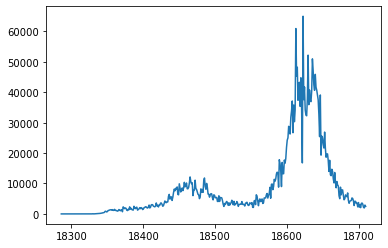

In [77]:
cali_daily = us_state_daily.loc[us_state_daily['state'] == "California"].loc[:,['date', 'cases', 'deaths']].groupby(['date']).sum()
cali_daily = cali_daily.reset_index()
plt.plot(dates.datestr2num(cali_daily['date']), cali_daily['cases'])

In [34]:
policy_data = pd.read_excel("our_data/policy_data/international/covid_amp_2021-4-10.xlsx")

In [84]:
policy_data

,Unique ID,Authorizing level of government,Authorizing country name,Authorizing country ISO,"Authorizing state/province, if applicable","Authorizing local area (e.g., county, city)","Authorizing role (e.g., official with authority)","Authorizing body (e.g., agency, office)","Name of official, if relevant",Affected level of government,...,Policy/law type,Data source for law/policy,PDF file name of law/policy,Permalink for policy PDF(s),Policy number,Authorizing entity has authority?,"Relevant authority (e.g., statute) to make the law/policy",Data source for authority to make the law/policy,Home rule state?,Dillon's Rule State
0,55212,State / Province,United States of America (USA),USA,California,NaN,Governor,Office of the Governor,Gavin Newsom,State / Province,...,Order,https://leginfo.legislature.ca.gov/faces/billT...,attiSfgxvM9GdnCBv - California_Order_expansion...,https://api.covidamp.org/get/file/redirect?id=...,1977804676,In progress,Section 17052 of the Revenue and Taxation Code...,In progress,NaN,NaN
1,28309,Country,Germany (DEU),DEU,NaN,NaN,Chancellor,Federal Parliament (Bundestag),Angela Merkel,Country,...,Statute,https://www.bgbl.de/xaver/bgbl/start.xav?start...,attvhviyheZPlWNO7 - Germany_Order_Fed Budget_2...,https://api.covidamp.org/get/file/redirect?id=...,777924064,In progress,In progress,In progress,NaN,NaN
2,28315,Country,Germany (DEU),DEU,NaN,NaN,Chancellor,Federal Parliament (Bundestag),Angela Merkel,Country,...,Statute,https://www.bgbl.de/xaver/bgbl/start.xav?start...,att6syVolLVDyWCsn - Germany_Order_Miscellaneou...,https://api.covidamp.org/get/file/redirect?id=...,785046217,In progress,In progress,In progress,NaN,NaN
3,76389,State / Province,Belgium (BEL),BEL,Bruxelles-Capitale,NaN,Minister-President of the Brussels-Capital region,NaN,R.Vervoort,State / Province,...,Order,http://www.ejustice.just.fgov.be/cgi/article.p...,att85IG5WUClar4Hm - BEL_BRUX_Arrete_04:23:2020...,https://api.covidamp.org/get/file/redirect?id=...,76389,Yes,In progress,In progress,NaN,NaN
4,55214,State / Province,United States of America (USA),USA,California,NaN,Governor,Office of the Governor,Gavin Newsom,State / Province,...,Statute,https://leginfo.legislature.ca.gov/faces/billT...,attGFwaN6ruk210zR - California_county can use ...,https://api.covidamp.org/get/file/redirect?id=...,525336050,In progress,Section 5891.5 of the Welfare and Institutions...,In progress,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,75431,State / Province,United States of America (USA),USA,Georgia,NaN,Governor,Office of the Governor,Brad Little,State / Province,...,Order,NaN,attn7WNCDszqJUdQj - Georgia_Order_Healthy Geor...,NaN,75431,In progress,In progress,In progress,Yes,Yes
33936,75410,State / Province,United States of America (USA),USA,Georgia,NaN,Governor,Office of the Governor,Brad Little,State / Province,...,Order,NaN,attn7WNCDszqJUdQj - Georgia_Order_Healthy Geor...,NaN,75410,In progress,In progress,In progress,Yes,Yes
33937,56325,Local,United States of America (USA),USA,California,"Fresno County, CA",Chairman of the Board of Supervisors of the Co...,Board of Supervisors of the County of Fresno,Ernest Buddy Mendes,Local,...,Proclamation,NaN,attjGnroW4XTNU9O7 - 12-15-20 Fresno County Pol...,NaN,602053155,Yes,Pursuant to Part 2 of Division 31 Chapter 2.8 ...,In progress,NaN,NaN
33938,56324,Local,United States of America (USA),USA,California,"Fresno County, CA",Chairman of the Board of Supervisors of the Co...,Board of Supervisors of the County of Fresno,Ernest Buddy Mendes,Local,...,Proclamation,NaN,attu4xU7kXFXEEya7 - 12-15-20 Fresno County Pol...,NaN,602053155,Yes,"California established the Homeless Housing, A...",In progress,NaN,NaN


In [87]:

us_policy_data = policy_data.loc[(policy_data['Authorizing country name'] == 'United States of America (USA)') & (policy_data['Authorizing state/province, if applicable'] == 'New York')]
us_policy_data

,Unique ID,Authorizing level of government,Authorizing country name,Authorizing country ISO,"Authorizing state/province, if applicable","Authorizing local area (e.g., county, city)","Authorizing role (e.g., official with authority)","Authorizing body (e.g., agency, office)","Name of official, if relevant",Affected level of government,...,Policy/law type,Data source for law/policy,PDF file name of law/policy,Permalink for policy PDF(s),Policy number,Authorizing entity has authority?,"Relevant authority (e.g., statute) to make the law/policy",Data source for authority to make the law/policy,Home rule state?,Dillon's Rule State
7,69271,State / Province,United States of America (USA),USA,New York,NaN,Governor,Office of the Governor,Andrew Cuomo,State / Province,...,Order,https://www.governor.ny.gov/news/no-20289-cont...,att0gdkUAukAwzx91 - New York_Order_Extend Nurs...,https://api.covidamp.org/get/file/redirect?id=...,1127605358,In progress,Section 29-a of Article 2-B of the Executive Law,In progress,Yes,Yes
304,7598,State / Province,United States of America (USA),USA,New York,NaN,Governor,Office of the Governor,Andrew Cuomo,State / Province,...,Order,https://www.governor.ny.gov/sites/governor.ny....,attZsZHo1K74hpYvt - New York_Order_General Eme...,https://api.covidamp.org/get/file/redirect?id=...,1040752227,In progress,"New York Consolidated Law, Executive Law §29-a",In progress,Yes,Yes
307,6654,State / Province,United States of America (USA),USA,New York,NaN,Governor,Office of the Governor,Andrew Cuomo,State / Province,...,Order,https://www.governor.ny.gov/sites/governor.ny....,attZsZHo1K74hpYvt - New York_Order_General Eme...,https://api.covidamp.org/get/file/redirect?id=...,1040752227,Yes,"New York Consolidated Law, Executive Law §29-a",https://codes.findlaw.com/ny/executive-law/exc...,Yes,Yes
310,6655,State / Province,United States of America (USA),USA,New York,NaN,Governor,Office of the Governor,Andrew Cuomo,State / Province,...,Order,https://www.governor.ny.gov/sites/governor.ny....,attZsZHo1K74hpYvt - New York_Order_General Eme...,https://api.covidamp.org/get/file/redirect?id=...,1040752227,Yes,"New York Consolidated Law, Executive Law §29-a",https://codes.findlaw.com/ny/executive-law/exc...,Yes,Yes
313,6652,State / Province,United States of America (USA),USA,New York,NaN,Governor,Office of the Governor,Andrew Cuomo,State / Province,...,Order,https://www.governor.ny.gov/sites/governor.ny....,attZsZHo1K74hpYvt - New York_Order_General Eme...,https://api.covidamp.org/get/file/redirect?id=...,1040752227,Yes,"New York Consolidated Law, Executive Law §28",https://codes.findlaw.com/ny/executive-law/exc...,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30939,69323,Local,United States of America (USA),USA,New York,"New York City (city), NY",Mayor,Office of the Mayor,Bill de Blasio,Local,...,Order,NaN,att4I1Vk5TTNp9Ozw - New York_New York City_Ord...,NaN,1210432169,In progress,Laws of the State of New York and the City of ...,In progress,Yes,Yes
30962,69325,Local,United States of America (USA),USA,New York,"New York City (city), NY",Mayor,Office of the Mayor,Bill de Blasio,Local,...,Order,NaN,attQmr6P3J5prulaK - New York_New York City_Ord...,NaN,287969292,In progress,New York_New York City_Order_Incorporating Gov...,In progress,Yes,Yes
31173,69324,Local,United States of America (USA),USA,New York,"New York City (city), NY",Mayor,Office of the Mayor,Bill de Blasio,Local,...,Order,NaN,attWvqcxKWGdEZclu - New York_New York City_Ord...,NaN,1505055562,In progress,Laws of the State of New York and the City of ...,In progress,Yes,Yes
31542,69304,Local,United States of America (USA),USA,New York,"New York City (city), NY",Mayor,Office of the Mayor,Bill de Blasio,Local,...,Order,NaN,attgDiZssIWzOP90a - New York_New York City_Ord...,NaN,1283155432,In progress,Laws of the State of New York and the City of ...,In progress,Yes,Yes
